In [1]:
# Load dataset

import pandas as pd
import seaborn as sns

churn_od = pd.read_csv('../data/Churn_OD.txt', delimiter = "|", encoding= 'unicode_escape')
churn_user_profile = pd.read_csv('../data/Churn_UsersProfile.txt', delimiter = "|", encoding= 'unicode_escape')

In [2]:
churn_od.shape, churn_user_profile.shape

((2253, 8), (544, 7))

In [3]:
churn_od.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341


In [4]:
churn_user_profile.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092


In [5]:
churn_user_profile[churn_user_profile['County_of_Origin'] == 'Vila do Conde']

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
242,R2 - AM Porto,Porto,Vila do Conde,Sep-19 to Feb-20,Female,25-34,335.380123
243,R2 - AM Porto,Porto,Vila do Conde,Sep-19 to Feb-20,Female,35-44,144.469939
244,R2 - AM Porto,Porto,Vila do Conde,Sep-19 to Feb-20,Male,45-54,76.945089
527,R2 - AM Porto,Porto,Vila do Conde,Sep-20 to Jan-21,Female,25-34,283.342437
528,R2 - AM Porto,Porto,Vila do Conde,Sep-20 to Jan-21,Female,35-44,9.758835
529,R2 - AM Porto,Porto,Vila do Conde,Sep-20 to Jan-21,Female,45-54,76.844212
530,R2 - AM Porto,Porto,Vila do Conde,Sep-20 to Jan-21,Male,25-34,13.155082
531,R2 - AM Porto,Porto,Vila do Conde,Sep-20 to Jan-21,Male,35-44,17.975581
532,R2 - AM Porto,Porto,Vila do Conde,Sep-20 to Jan-21,Male,55-64,74.179387


In [9]:
import numpy as np

churn_user_profile_copy = churn_user_profile.copy()

tmp = churn_user_profile_copy.merge(
    churn_user_profile_copy, on=[
        'Region_of_Origin', 
        'District_of_Origin', 
        'County_of_Origin',
        'GenderDescription',  # Replace by aggregate_variables 
        'AgeClassDescription'
    ], how='left'
)

# Keep rows where period_x is different from period_y, and period_x is in 2019
tmp = tmp[tmp.Period_x != tmp.Period_y]
tmp = tmp[tmp.Period_x == 'Sep-19 to Feb-20']

tmp['Relative_Change_AverageBusUsers'] = (tmp['Average_BusUsers_per_Day_y'] - tmp['Average_BusUsers_per_Day_x'])/(tmp['Average_BusUsers_per_Day_x'])
tmp['Relative_Change_AverageBusUsers_Abs'] = np.abs((tmp['Average_BusUsers_per_Day_y'] - tmp['Average_BusUsers_per_Day_x']))/(tmp['Average_BusUsers_per_Day_x'])

In [10]:
# Example of the data in Vila do Conde, in the two groups that have data

tmp[
    (tmp.County_of_Origin == 'Vila do Conde')
]

,Region_of_Origin,District_of_Origin,County_of_Origin,Period_x,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day_x,Period_y,Average_BusUsers_per_Day_y,Relative_Change_AverageBusUsers,Relative_Change_AverageBusUsers_Abs
470,R2 - AM Porto,Porto,Vila do Conde,Sep-19 to Feb-20,Female,25-34,335.380123,Sep-20 to Jan-21,283.342437,-0.155160,0.155160
472,R2 - AM Porto,Porto,Vila do Conde,Sep-19 to Feb-20,Female,35-44,144.469939,Sep-20 to Jan-21,9.758835,-0.932451,0.932451


In [11]:
daily_users_changes = tmp

### Some baseline statistics on Relative Change in Average Users:

1) Median value is negative: Decrease in users by 36%. The mean value is positive, due to some outliers.

2) Seixal users increased from 37 to 1631, for 15-24 Males!! 
Maybe it is due to the suspension of a boat connection between Seixal and Lisbon?
https://www.publico.pt/2020/10/22/local/noticia/ligacao-fluvial-seixal-lisboa-suspensa-partir-segundafeira-obras-1936350 

The news says the average is 2400 per day, but maybe not in this segment of the population?

3) The highest decrease is in Santa Maria da Feira, 25-34 Females.

4) The lowest absolute change is in Seixal as well, but from the group Male 55-64.

In [12]:
daily_users_changes['Relative_Change_AverageBusUsers'].median(), daily_users_changes['Relative_Change_AverageBusUsers'].mean()

(-0.3636859325701661, 0.3540754887378469)

In [13]:
daily_users_changes.iloc[daily_users_changes['Relative_Change_AverageBusUsers'].argmax()]

Region_of_Origin                         R1 - AM Lisboa
District_of_Origin                             SetÃºbal
County_of_Origin                                 Seixal
Period_x                               Sep-19 to Feb-20
GenderDescription                                  Male
AgeClassDescription                               15-24
Average_BusUsers_per_Day_x                      37.6977
Period_y                               Sep-20 to Jan-21
Average_BusUsers_per_Day_y                      1631.34
Relative_Change_AverageBusUsers                 42.2742
Relative_Change_AverageBusUsers_Abs             42.2742
Name: 288, dtype: object

In [14]:
daily_users_changes.iloc[daily_users_changes['Relative_Change_AverageBusUsers'].argmin()]

Region_of_Origin                              R2 - AM Porto
District_of_Origin                                   Aveiro
County_of_Origin                       Santa Maria da Feira
Period_x                                   Sep-19 to Feb-20
GenderDescription                                    Female
AgeClassDescription                                   25-34
Average_BusUsers_per_Day_x                          153.751
Period_y                                   Sep-20 to Jan-21
Average_BusUsers_per_Day_y                          5.51498
Relative_Change_AverageBusUsers                   -0.964131
Relative_Change_AverageBusUsers_Abs                0.964131
Name: 336, dtype: object

In [15]:
daily_users_changes.iloc[daily_users_changes['Relative_Change_AverageBusUsers_Abs'].argmin()]

Region_of_Origin                         R1 - AM Lisboa
District_of_Origin                             SetÃºbal
County_of_Origin                                 Seixal
Period_x                               Sep-19 to Feb-20
GenderDescription                                  Male
AgeClassDescription                               55-64
Average_BusUsers_per_Day_x                      1141.76
Period_y                               Sep-20 to Jan-21
Average_BusUsers_per_Day_y                      1118.73
Relative_Change_AverageBusUsers              -0.0201688
Relative_Change_AverageBusUsers_Abs           0.0201688
Name: 296, dtype: object

In [16]:
(daily_users_changes['Relative_Change_AverageBusUsers'] < 0).mean()

0.799163179916318

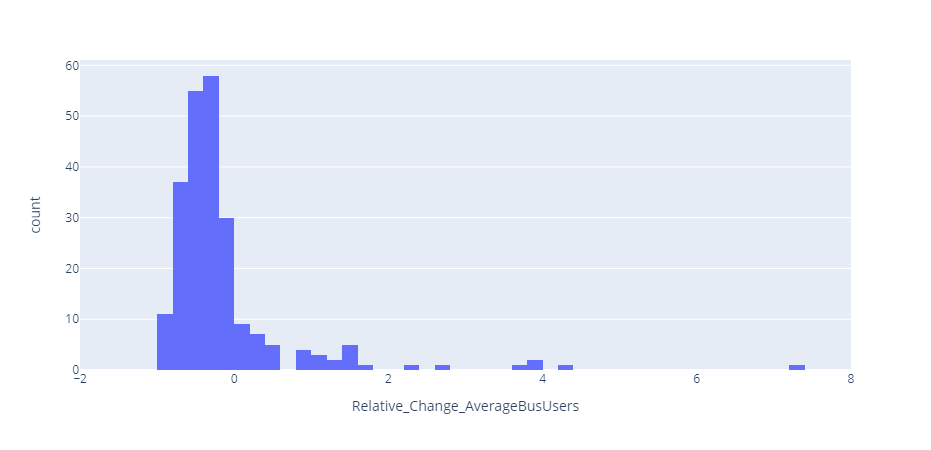

In [30]:
import plotly.express as px
fig = px.histogram(daily_users_changes, x="Relative_Change_AverageBusUsers", nbins=256)
fig.update_xaxes(range=[-2, 8])
fig.show()

In [24]:
churn_od_std_demand = churn_od.groupby(['Region_of_Origin', 'District_of_Origin', 'County_of_Origin'])['Demand_weight'].std().reset_index()

churn_od_std_demand.rename(columns = {'Demand_weight': 'std_demand_weight'}, inplace=True)

In [26]:
# Sorting SD in descending order
churn_od_std_demand.sort_values(by=['std_demand_weight'], ascending=[False])

,Region_of_Origin,District_of_Origin,County_of_Origin,std_demand_weight
22,R2 - AM Porto,Aveiro,Vale de Cambra,0.137990
9,R1 - AM Lisboa,SetÃºbal,Alcochete,0.118616
19,R2 - AM Porto,Aveiro,Oliveira de AzemÃ©is,0.110216
18,R2 - AM Porto,Aveiro,Espinho,0.096775
28,R2 - AM Porto,Porto,PÃ³voa de Varzim,0.065145
20,R2 - AM Porto,Aveiro,Santa Maria da Feira,0.061624
30,R2 - AM Porto,Porto,Trofa,0.061456
29,R2 - AM Porto,Porto,Santo Tirso,0.058835
33,R2 - AM Porto,Porto,Vila do Conde,0.058802
12,R1 - AM Lisboa,SetÃºbal,Moita,0.055400


In [31]:
tmp = daily_users_changes.groupby('County_of_Origin')['Relative_Change_AverageBusUsers'].mean().reset_index()

In [32]:
tmp.merge(churn_od_std_demand)

,County_of_Origin,Relative_Change_AverageBusUsers,Region_of_Origin,District_of_Origin,std_demand_weight
0,Alcochete,0.062548,R1 - AM Lisboa,SetÃºbal,0.118616
1,Almada,2.527883,R1 - AM Lisboa,SetÃºbal,0.033391
2,Amadora,0.334526,R1 - AM Lisboa,Lisboa,0.038087
3,Barreiro,-0.311165,R1 - AM Lisboa,SetÃºbal,0.034393
4,Cascais,-0.351603,R1 - AM Lisboa,Lisboa,0.024071
5,Espinho,-0.449227,R2 - AM Porto,Aveiro,0.096775
6,Gondomar,-0.203727,R2 - AM Porto,Porto,0.042371
7,Lisboa,-0.390986,R1 - AM Lisboa,Lisboa,0.024106
8,Loures,0.466681,R1 - AM Lisboa,Lisboa,0.040248
9,Mafra,-0.423741,R1 - AM Lisboa,Lisboa,0.027646
